<a href="https://colab.research.google.com/github/Souravdani/Customer-Segmentation-using-Machine-Learning/blob/master/ML_Project_Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using Machine Learning

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv(r"C:\Users\Yash Agarwal\Desktop\Datasets\Customer_segmentation\Mall_Customers.csv")

# Display top  rows

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Display last 5  rows

In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Finding shape

In [ ]:
data.shape

(200, 5)

In [ ]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 200
Number of Columns 5


# Get information about our dataset like rows, columns, datatypes of each column and memory requirement¶

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Check Null values in the dataset

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Overall statistics about the dataset

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# K means clustering

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# we will only use two columns for visualising
x=data[["Annual Income (k$)", "Spending Score (1-100)"]]

In [ ]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# training our model
k_means=KMeans()
k_means.fit(x)

KMeans()

In [ ]:
# identiying clusters by creating dependent variables or clusters
k_means.fit_predict(x)
# by default in kmeans n_clusters is 8 (no. of clusters) i.e., 0 to 7
# now our customers are divided into 8 groups or clusters

array([1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6,
       1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 7, 3, 7, 3,
       2, 3, 7, 3, 7, 3, 7, 3, 7, 3, 2, 3, 7, 3, 2, 3, 7, 3, 7, 3, 7, 3,
       7, 3, 7, 3, 7, 3, 2, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3,
       7, 3, 7, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0])

# Elbow Method to find optimal number of clusters

In [ ]:
wcss=[]
for i in range (1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(x)
    wcss.append(k_means.inertia_)
    
# k_means.inertia_ contains the calculated value of wcss

C:\Users\Yash Agarwal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30241.343617936593,
 25063.652515864094,
 22143.22210076745,
 19649.596582866965]

# Visualising wcss

In [ ]:
import matplotlib.pyplot as plt

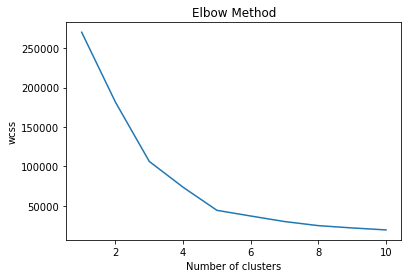

In [ ]:
plt.plot(range(1,11),wcss)
# on x aixis no. of clusters
# on y axis wcss
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

# Model Training

In [ ]:
x=data[["Annual Income (k$)", "Spending Score (1-100)"]]

In [ ]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
k_means=KMeans(n_clusters=5, random_state=42)

In [ ]:
# both fit and predicts
y_means=k_means.fit_predict(x)

In [ ]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

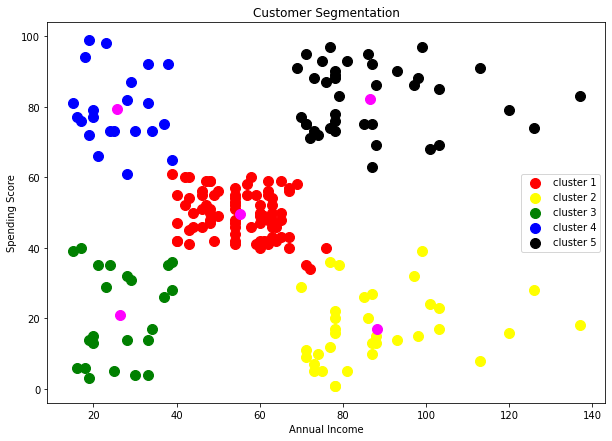

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x.iloc[y_means==0,0],x.iloc[y_means==0,1],s=100,c="red", label="cluster 1")
# y_means==0,0..y_means=0 indicates customers belonging to 0 clusters and 0 indicates annual income
plt.scatter(x.iloc[y_means==1,0],x.iloc[y_means==1,1],s=100,c="yellow", label="cluster 2")
plt.scatter(x.iloc[y_means==2,0],x.iloc[y_means==2,1],s=100,c="green", label="cluster 3")
plt.scatter(x.iloc[y_means==3,0],x.iloc[y_means==3,1],s=100,c="blue", label="cluster 4")
plt.scatter(x.iloc[y_means==4,0],x.iloc[y_means==4,1],s=100,c="black", label="cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="magenta")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# k means using input as array

In [ ]:
x=data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [ ]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
k_means=KMeans(n_clusters=5, random_state=42)

In [ ]:
y_means=k_means.fit_predict(x)

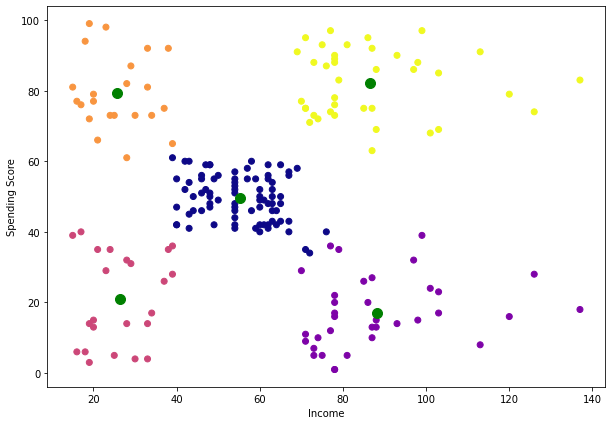

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1],c=y_means,cmap="plasma")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="green")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

# making predictions

In [ ]:
k_means.predict([[15,39]])
# 15 as annual income
# 39 as spending score
# it belongs to cluster 3

array([2])

# Save the model

In [ ]:
import joblib

In [ ]:
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [ ]:
model=joblib.load("customer_segmentation")

In [ ]:
model.predict([[15,19]])

array([2])

# GUI

In [ ]:
from tkinter import *
import joblib

In [ ]:
def show_entry():
    p1=int(e1.get())
    p2=int(e2.get())
    
    model=joblib.load("customer_segmentation")
    result=model.predict([[p1,p2]])
    print("This customer belongs to cluster no:", result[0])
    
    if result[0]==0:
        Label(master, text="Customers with medium annual income and medium annual spend")
        
    elif result[0]==1:
        Label(master, text="Customers with high annual income but low annual spend")
        
        
    elif result[0]==2:
        Label(master, text="Customers with low annual income and low annual spend")
        
        
    elif result[0]==3:
        Label(master, text="Customers with low annual income and high annual spend")
        
        
    elif result[0]==4:
        Label(master, text="Customers with high annual income and high annual spend")
        
master=Tk()
master.title("Customer Segmentation using Machine Learning")
label=Label(master, text="Customer Segmentation using Machine Learning", bg="black",
           fg="white").grid(row=0, columnspan=True)
Label(master, text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)


e1=Entry(master)
e2=Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text="Predict", command=show_entry).grid()

mainloop()
    

# DBSCAN

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
x=data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [ ]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
x.shape

(200, 2)

In [ ]:
# for calculating the value of epsilon
from sklearn.neighbors import NearestNeighbors
neighb=NearestNeighbors(n_neighbors=2)
nbrs=neighb.fit(x)
distances, indices=nbrs.kneighbors(x) # finding the nearest neighbors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

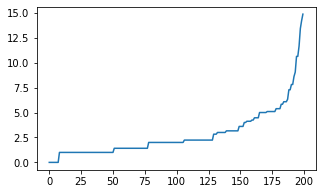

In [ ]:
distances=np.sort(distances,axis=0) # sorting the distances
distances=distances[:,1] # taking the second column of the sorted distances
plt.rcParams["figure.figsize"]=(5,3) # setting the figure size
plt.plot(distances)
plt.show()

from the above plot maximum curvature ia around 8. so epsilon is 8
since 2-d dataset min point is 4

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=8, min_samples=8).fit(x)
labels=dbscan.labels_

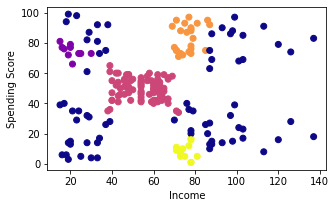

In [ ]:
# plotting the cluster
plt.scatter(x[:,0], x[:,1],c=labels,cmap="plasma")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

# Heirarchial clustering

In [ ]:
x=data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [ ]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Text(0, 0.5, 'Euclidean distance')

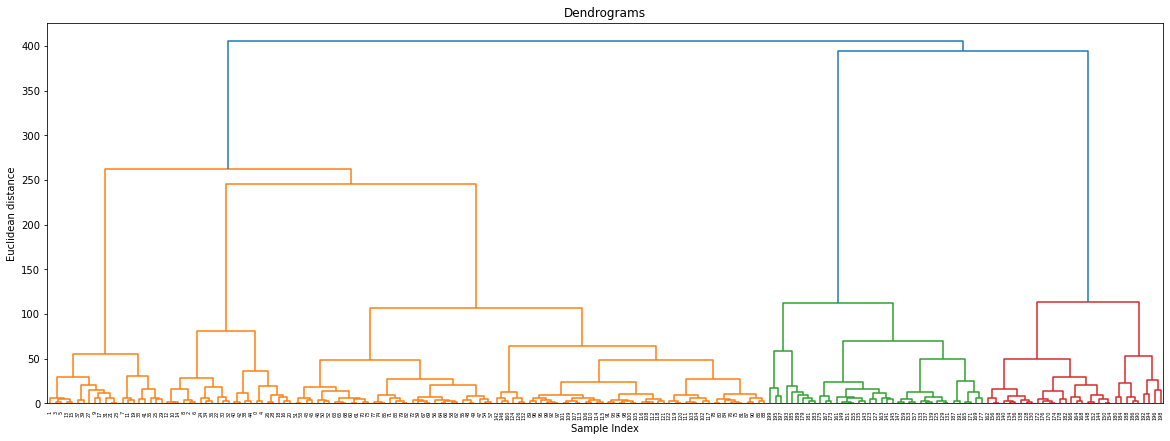

In [ ]:
import scipy.cluster.hierarchy as sc

# plot dendrogram
plt.figure(figsize=(20,7))
plt.title("Dendrograms")

# create dendogram
sc.dendrogram(sc.linkage(x, method="ward"))


plt.xlabel("Sample Index")
plt.ylabel("Euclidean distance")

using above denrogram we divide our data into 5 clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
cluster.fit(x)
labels=cluster.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

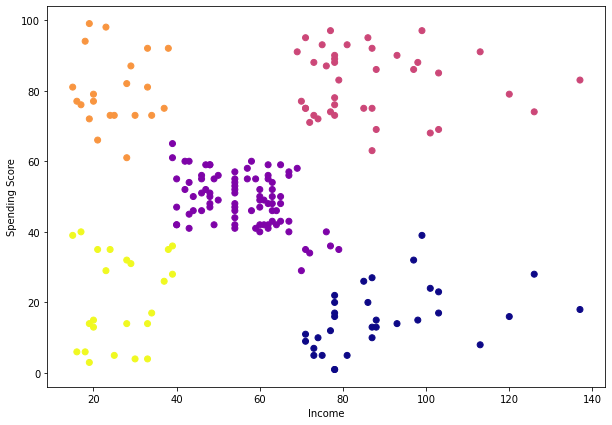

In [ ]:
# visualise the cluster
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1],c=labels,cmap="plasma")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()